# data-scientist-exercise01

Primary References:
- https://www.datacamp.com/community/tutorials/decision-tree-classification-python
- http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/
- https://www.geeksforgeeks.org/confusion-matrix-machine-learning/ 
- StackOverflow
- StackExchange
- ect.

### 4. Import the "flattened" table (or CSV file) into your open source analytic environment of choice (R, Python, Java, etc.) and stage it for analysis.

In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import sys
!{sys.executable} -m pip install pydotplus
import sys
!{sys.executable} -m pip install graphviz
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore') 

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
mydata= "flattenedRecords.csv"
df = pd.read_csv(mydata) 
df.head()
df.columns
#df.isnull().sum()

Index(['id', 'age', 'workClass', 'eduLevel', 'eduNum', 'maritalStatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalGain',
       'capitalLoss', 'hoursPerWeek', 'country', 'over50K'],
      dtype='object')

### 6. Split the data into training, validation, and test data sets.

In [3]:
#what is the current # of 0 and 1 in column
(df['over50K'].value_counts()/df['over50K'].count())*100

0    76.071823
1    23.928177
Name: over50K, dtype: float64

In [4]:
# converting all '?' to NaN
df = df.mask(df=='?', float('NaN'))

#SKLearn only takes # so I have to change all of the Strings to #
# use pd.concat to join the new columns with your original dataframe
df = pd.concat([df,pd.get_dummies(df['workClass'], prefix='workClass')],axis=1)
df = pd.concat([df,pd.get_dummies(df['eduLevel'], prefix='eduLevel')],axis=1)
df = pd.concat([df,pd.get_dummies(df['maritalStatus'], prefix='maritalStatus')],axis=1)
df = pd.concat([df,pd.get_dummies(df['occupation'], prefix='occupation')],axis=1)
df = pd.concat([df,pd.get_dummies(df['relationship'], prefix='relationship')],axis=1)
df = pd.concat([df,pd.get_dummies(df['race'], prefix='race')],axis=1)
df = pd.concat([df,pd.get_dummies(df['sex'], prefix='sex')],axis=1)
df = pd.concat([df,pd.get_dummies(df['country'], prefix='country')],axis=1)
                     
# get rid of the original column
df.drop(['workClass'],axis=1, inplace=True)
df.drop(['eduLevel'],axis=1, inplace=True)
df.drop(['maritalStatus'],axis=1, inplace=True)
df.drop(['occupation'],axis=1, inplace=True)
df.drop(['relationship'],axis=1, inplace=True)
df.drop(['race'],axis=1, inplace=True)
df.drop(['sex'],axis=1, inplace=True)
df.drop(['country'],axis=1, inplace=True)

#show all column names
for col in df.columns: 
    print(col) 

id
age
eduNum
capitalGain
capitalLoss
hoursPerWeek
over50K
workClass_Federal-gov
workClass_Local-gov
workClass_Never-worked
workClass_Private
workClass_Self-emp-inc
workClass_Self-emp-not-inc
workClass_State-gov
workClass_Without-pay
eduLevel_10th
eduLevel_11th
eduLevel_12th
eduLevel_1st-4th
eduLevel_5th-6th
eduLevel_7th-8th
eduLevel_9th
eduLevel_Assoc-acdm
eduLevel_Assoc-voc
eduLevel_Bachelors
eduLevel_Doctorate
eduLevel_HS-grad
eduLevel_Masters
eduLevel_Preschool
eduLevel_Prof-school
eduLevel_Some-college
maritalStatus_Divorced
maritalStatus_Married-AF-spouse
maritalStatus_Married-civ-spouse
maritalStatus_Married-spouse-absent
maritalStatus_Never-married
maritalStatus_Separated
maritalStatus_Widowed
occupation_Adm-clerical
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_Other-service
occupation_Priv-house-serv
occupation_Prof-specialty
occupation_Protective-serv


In [5]:
#split dataset in target and other
target = ['over50K']

other = ['id', 'age', 'eduNum', 'capitalGain', 'capitalLoss', 'hoursPerWeek',
         'workClass_Federal-gov', 'workClass_Local-gov',
       'workClass_Never-worked', 'workClass_Private', 'workClass_Self-emp-inc',
       'workClass_Self-emp-not-inc', 'workClass_State-gov',
       'workClass_Without-pay', 'eduLevel_10th', 'eduLevel_11th',
       'eduLevel_12th', 'eduLevel_1st-4th', 'eduLevel_5th-6th',
       'eduLevel_7th-8th', 'eduLevel_9th', 'eduLevel_Assoc-acdm',
       'eduLevel_Assoc-voc', 'eduLevel_Bachelors', 'eduLevel_Doctorate',
       'eduLevel_HS-grad', 'eduLevel_Masters', 'eduLevel_Preschool',
       'eduLevel_Prof-school', 'eduLevel_Some-college',
       'maritalStatus_Divorced', 'maritalStatus_Married-AF-spouse',
       'maritalStatus_Married-civ-spouse',
       'maritalStatus_Married-spouse-absent', 'maritalStatus_Never-married',
       'maritalStatus_Separated', 'maritalStatus_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'sex_Female', 'sex_Male','country_Cambodia', 'country_Canada','country_China',
         'country_Columbia','country_Cuba','country_Dominican-Republic','country_Ecuador','country_El-Salvador',
         'country_England','country_France','country_Germany','country_Greece','country_Guatemala','country_Haiti',
         'country_Holand-Netherlands','country_Honduras','country_Hong','country_Hungary','country_India','country_Iran',
         'country_Ireland','country_Italy','country_Jamaica','country_Japan','country_Laos','country_Mexico','country_Nicaragua',
         'country_Outlying-US(Guam-USVI-etc)','country_Peru','country_Philippines','country_Poland','country_Portugal','country_Puerto-Rico', 'country_Scotland',
       'country_South', 'country_Taiwan', 'country_Thailand',
       'country_Trinadad&Tobago', 'country_United-States', 'country_Vietnam',
       'country_Yugoslavia']

X = df[other]
y = df[target] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1) # 50% training and 20% test
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state=2)# 50% training and 20% Validation

#CHECK We expect the training features number of columns to match the testing feature number of columns and the number of rows to match for the respective training and testing features and the labels
print('X_train Shape of XTrain:', X_train.shape)
print('y_train Shape of YTrain:', y_train.shape)
print('X_test Shape of XTest:', X_test.shape)
print('y_test Shape of YTest:', y_test.shape)
print('Shape of XValidation:', X_validation.shape)
print('Shape of YValidation:', y_validation.shape)

X_train Shape of XTrain: (31258, 105)
y_train Shape of YTrain: (31258, 1)
X_test Shape of XTest: (9769, 105)
y_test Shape of YTest: (9769, 1)
Shape of XValidation: (7815, 105)
Shape of YValidation: (7815, 1)


### 7. Develop a model that predicts whether individuals, based on the census variables provided, make over $50,000/year. Use over_50k as the target variable.

In [6]:
# Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#ValueError: could not convert string to float: '?' 
    #for this reason I will now convert
    
results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results,"\n") 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred),"\n")
print('Report : ')
print(classification_report(y_test, y_pred))

Confusion Matrix :
[[6466  964]
 [ 876 1463]] 

Accuracy: 0.8116490940730884 

Report : 
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7430
           1       0.60      0.63      0.61      2339

    accuracy                           0.81      9769
   macro avg       0.74      0.75      0.74      9769
weighted avg       0.81      0.81      0.81      9769



In [7]:
# BETTER Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=12)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results,"\n") 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred),"\n")
print('Report : ')
print(classification_report(y_test, y_pred))

Confusion Matrix :
[[7024  406]
 [ 995 1344]] 

Accuracy: 0.8565871634763026 

Report : 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7430
           1       0.77      0.57      0.66      2339

    accuracy                           0.86      9769
   macro avg       0.82      0.76      0.78      9769
weighted avg       0.85      0.86      0.85      9769



In [8]:
#print(dict(zip(X_test.columns, clf.feature_importances_)))

In [10]:
for name, importance in zip(df[other], clf.feature_importances_):
    print(name, "=", importance)

importances = clf.feature_importances_
indices = np.argsort(importances)
print(indicies)
#plt.title('Feature Importances')
#plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), [other[i] for i in indices])
#plt.xlabel('Relative Importance')
#plt.show()

id = 0.028870778255022024
age = 0.08263388942732931
eduNum = 0.1476453860565045
capitalGain = 0.2000110227092714
capitalLoss = 0.059930586272365444
hoursPerWeek = 0.04509792052600999
workClass_Federal-gov = 0.0014022310833165395
workClass_Local-gov = 0.0020110606098795625
workClass_Never-worked = 0.0
workClass_Private = 0.0024478018557916744
workClass_Self-emp-inc = 0.0009646476723357138
workClass_Self-emp-not-inc = 0.00646351917161759
workClass_State-gov = 0.00051452617847699
workClass_Without-pay = 0.0
eduLevel_10th = 0.0
eduLevel_11th = 0.00035370089516066546
eduLevel_12th = 0.00041176956090090757
eduLevel_1st-4th = 0.0
eduLevel_5th-6th = 0.000253585389740847
eduLevel_7th-8th = 0.0
eduLevel_9th = 0.0
eduLevel_Assoc-acdm = 0.0
eduLevel_Assoc-voc = 0.0002746682210138181
eduLevel_Bachelors = 0.0004192550779897273
eduLevel_Doctorate = 0.0003308914107703072
eduLevel_HS-grad = 0.004029841187485905
eduLevel_Masters = 0.0005151139644864104
eduLevel_Preschool = 0.0
eduLevel_Prof-school = 0.0

NameError: name 'indicies' is not defined

In [ ]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results,"\n") 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred),"\n")
print('Report : ')
print(classification_report(y_test, y_pred))

In [ ]:
for name, importance in zip(df[other], clf.feature_importances_):
    print(name, "=", importance)

importances = clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [other[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [12]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                               Specs         Score
3                        capitalGain  7.872878e+07
4                        capitalLoss  1.172107e+06
0                                 id  9.776095e+03
1                                age  7.682975e+03
5                       hoursPerWeek  6.253200e+03
32  maritalStatus_Married-civ-spouse  3.370525e+03
51              relationship_Husband  3.085344e+03
2                             eduNum  2.178715e+03
34       maritalStatus_Never-married  2.106158e+03
54            relationship_Own-child  1.338031e+03


[1.67367625e-01 1.58120494e-01 3.39497583e-02 6.49529970e-02
 2.19403640e-02 9.71974913e-02 5.46163402e-03 5.96415238e-03
 0.00000000e+00 1.09870828e-02 5.77313775e-03 7.54246606e-03
 4.84818260e-03 1.46757450e-04 2.25313108e-03 2.61656833e-03
 1.00404382e-03 2.60458471e-04 6.91504532e-04 1.93113766e-03
 1.53966976e-03 2.75692355e-03 3.47348522e-03 2.02541189e-02
 4.83448345e-03 8.40557518e-03 1.13892428e-02 5.34315234e-05
 6.96076261e-03 5.80284042e-03 1.15081347e-02 4.24603198e-04
 1.00097537e-01 8.07957103e-04 1.73664855e-02 1.69475812e-03
 1.37402618e-03 5.13195456e-03 1.25492125e-04 5.73761697e-03
 2.02310982e-02 4.34380983e-03 3.82202126e-03 5.46685581e-03
 9.61193427e-03 1.61247752e-04 1.68819231e-02 3.18415157e-03
 5.83823926e-03 4.15456570e-03 3.80854241e-03 2.04450621e-02
 1.02115965e-02 1.34055084e-03 1.16666025e-02 7.10607633e-03
 8.15855158e-03 1.42438728e-03 3.38452501e-03 4.64487823e-03
 1.12205750e-03 6.18636470e-03 4.15428990e-03 1.37124053e-02
 3.51009781e-04 1.610109

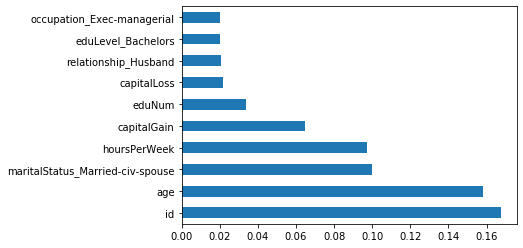

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()